In this Notebook, I will show how to apply simple linear regression with SKLEARN. I will examine the linear relation between size of a house and its price. In the end I will try to predict the price given the size of house.

### Let's import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # A small trick is to import some attributes of matplotlib to seaborn plots
from sklearn.linear_model import LinearRegression

### Let's read the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
data.shape

(100, 2)

### A little preprocessing before creating the regression model

In [20]:
x = data['size']
y = data['price']
print('x.shape: {}\ny.shape: {}'.format(x.shape, y.shape))

x.shape: (100,)
y.shape: (100,)


In [21]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# alternatively:
# x = x.values.reshape(100,1)
# x = x.values.reshape(100,1)

print('x.shape: {}\ny.shape: {}'.format(x.shape, y.shape))

x.shape: (100, 1)
y.shape: (100, 1)


### Train Test Split
Normally in case of multiple predictors, standardizing (scaling) the input values (before train test split) is important to prevent the cannibalization of some features by others. But here is only one input value.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Create and fit model

In [24]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Checking R2 value, coefficient and intercept

In [25]:
lr1.score(x_test, y_test)

0.6907868549524642

In [26]:
print('Coefficient: {}\nIntercept: {}'.format(lr1.coef_ ,lr1.intercept_))

Coefficient: [[218.98817817]]
Intercept: [108544.770137]


### Predicting for 400, 500, 600 square feet house prices

In [27]:
new = pd.DataFrame({'size':[400, 500, 600]})

new['predicted price'] = lr1.predict(new)
new

,size,predicted price
0,400,196140.041404
1,500,218038.859221
2,600,239937.677037


### Visualizing Outcomes

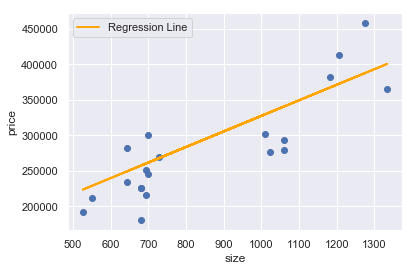

In [29]:
plt.scatter(x_test,y_test)

# y_hat = lr1.coef_*x_test + lr1.intercept_
y_hat = lr1.predict(x_test)

fig = plt.plot(x_test, y_hat, lw=2, c='orange', label='Regression Line')
plt.xlabel('size', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.legend()
plt.show()

As you can remember R Squarred was 0.69, which means it only explains 69% of variation in actual data. Trying to predict house price solely with size of it might not be the best approach. 